## Bibliotecas

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
import seaborn as sns
import matplotlib.pyplot as plt

## Leitura dos dados

In [2]:
df = pd.read_csv('temperatura_chuva_vazao_cota_CAIANA.csv', index_col='Data', parse_dates=['Data']).dropna()

In [3]:
df

,EstacaoCodigo_chuva,NivelConsistencia_chuva,Chuva,EstacaoCodigo_cota,NivelConsistencia_cota,Cota,EstacaoCodigo_vazao,NivelConsistencia_vazao,Vazao,EstacaoCodigo_temperatura,temperatura_media_compensada
Data,,,,,,,,,,,
2023-04-29,2041005,1,32.1,57700000,1,69.0,57700000,1,7.2248,83639,18.4
2023-04-28,2041005,1,0.0,57700000,1,69.0,57700000,1,7.2248,83639,16.2
2023-04-27,2041005,1,0.0,57700000,1,64.0,57700000,1,5.9040,83639,18.6
2023-04-26,2041005,1,0.0,57700000,1,64.0,57700000,1,5.9040,83639,17.4
2023-04-25,2041005,1,0.0,57700000,1,64.5,57700000,1,6.0080,83639,16.0
...,...,...,...,...,...,...,...,...,...,...,...
2010-01-05,2041005,1,0.3,57700000,2,132.0,57700000,2,22.2181,83639,16.6
2010-01-04,2041005,1,0.0,57700000,2,134.0,57700000,2,22.7492,83639,17.8
2010-01-03,2041005,1,0.0,57700000,2,118.0,57700000,2,18.6199,83639,15.8


## Análise Exploratória

In [4]:
df.describe()

,EstacaoCodigo_chuva,NivelConsistencia_chuva,Chuva,EstacaoCodigo_cota,NivelConsistencia_cota,Cota,EstacaoCodigo_vazao,NivelConsistencia_vazao,Vazao,EstacaoCodigo_temperatura,temperatura_media_compensada
count,4786.0,4786.0,4786.000000,4786.0,4786.000000,4786.000000,4786.0,4786.000000,4786.000000,4786.0,4786.000000
mean,2041005.0,1.0,3.875031,57700000.0,1.082115,69.186168,57700000.0,1.379858,7.302058,83639.0,15.232741
std,0.0,0.0,10.595015,0.0,0.274568,31.952437,0.0,0.485402,8.022456,0.0,3.868373
min,2041005.0,1.0,0.000000,57700000.0,1.000000,32.000000,57700000.0,1.000000,0.657400,83639.0,1.600000
25%,2041005.0,1.0,0.000000,57700000.0,1.000000,51.000000,57700000.0,1.000000,3.001900,83639.0,12.800000
50%,2041005.0,1.0,0.000000,57700000.0,1.000000,60.000000,57700000.0,1.000000,4.866000,83639.0,16.200000
75%,2041005.0,1.0,1.200000,57700000.0,1.000000,75.500000,57700000.0,2.000000,8.413200,83639.0,18.200000
max,2041005.0,1.0,109.100000,57700000.0,2.000000,500.000000,57700000.0,2.000000,162.980700,83639.0,22.300000


In [10]:
# Filtro de data
filtered_df = df.loc[(df.index >= '2022-01-01')
                     & (df.index < '2023-01-01')]

<Axes: xlabel='Data'>

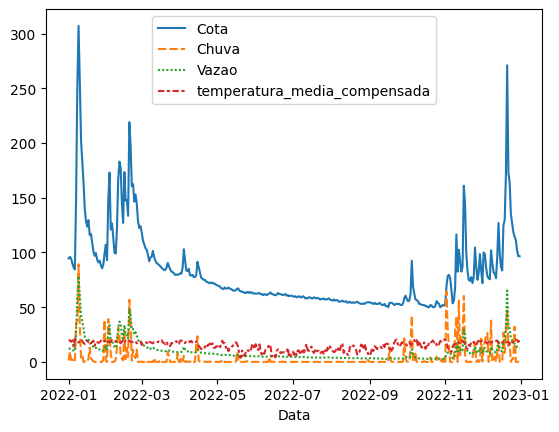

In [11]:
sns.lineplot(data=filtered_df[['Cota', 'Chuva','Vazao','temperatura_media_compensada']])

### Histogramas

<Axes: xlabel='Cota', ylabel='Count'>

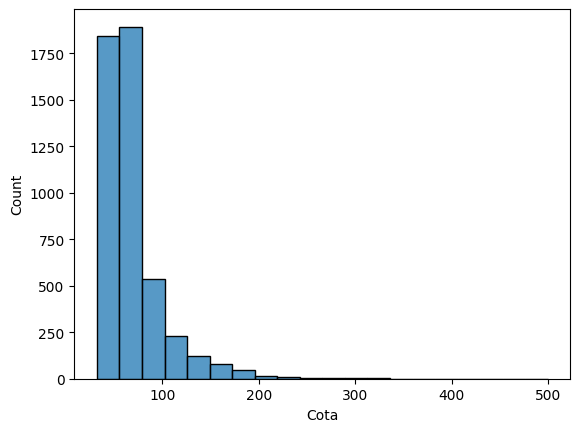

In [12]:
sns.histplot(df['Cota'],bins=20)

<Axes: xlabel='Vazao', ylabel='Count'>

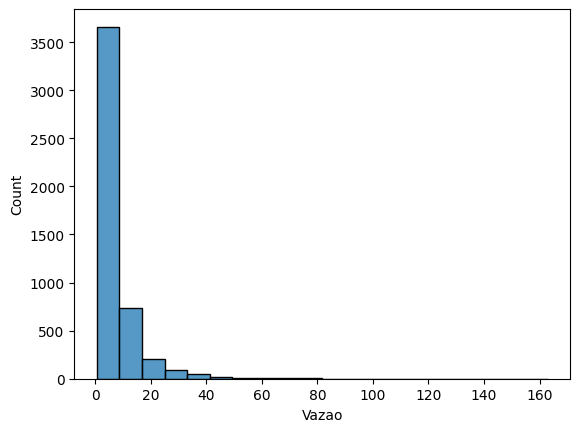

In [13]:
sns.histplot(df['Vazao'],bins=20)

<Axes: xlabel='Chuva', ylabel='Count'>

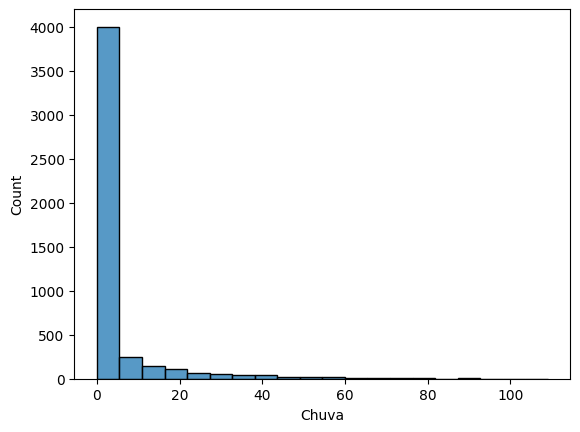

In [14]:
sns.histplot(df['Chuva'],bins=20)

<Axes: xlabel='temperatura_media_compensada', ylabel='Count'>

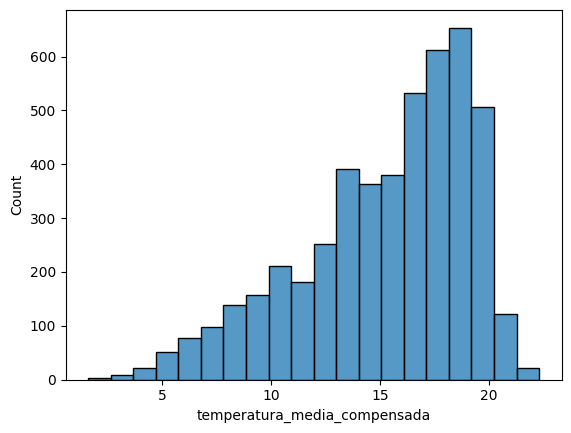

In [15]:
sns.histplot(df['temperatura_media_compensada'],bins=20)

### Distribuição

<Axes: xlabel='Vazao', ylabel='Density'>

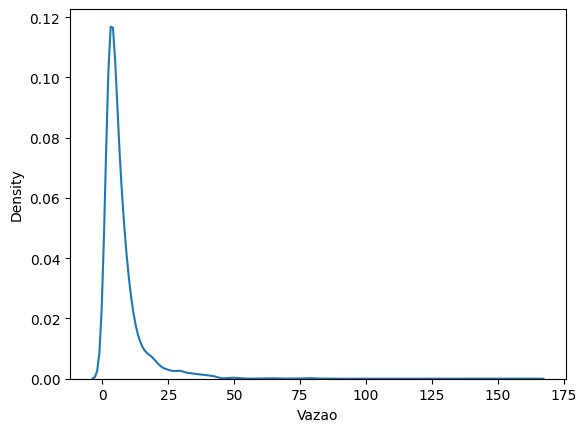

In [16]:
sns.kdeplot(df['Vazao'])

<Axes: xlabel='Cota', ylabel='Density'>

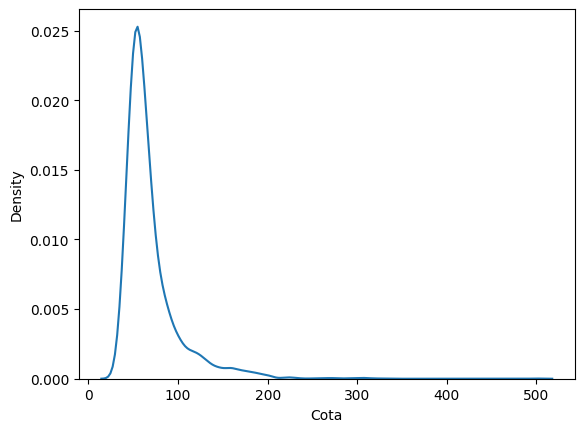

In [17]:
sns.kdeplot(df['Cota'])

<Axes: xlabel='Chuva', ylabel='Density'>

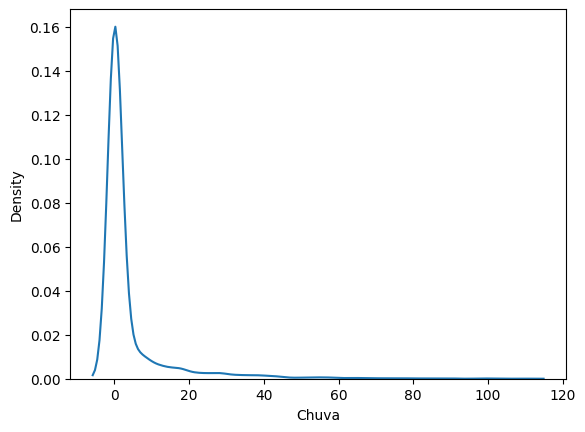

In [18]:
sns.kdeplot(df['Chuva'])

<Axes: xlabel='temperatura_media_compensada', ylabel='Density'>

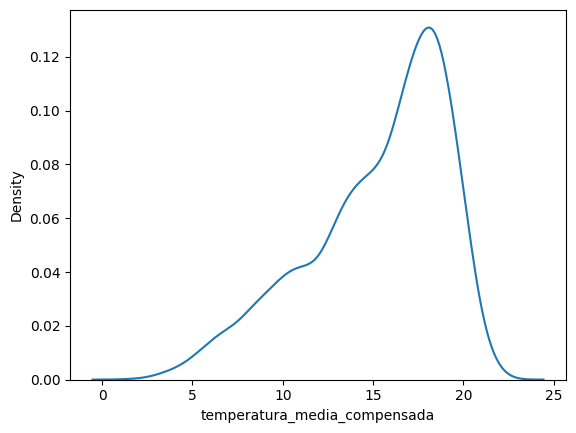

In [19]:
sns.kdeplot(df['temperatura_media_compensada'])

### Correlação

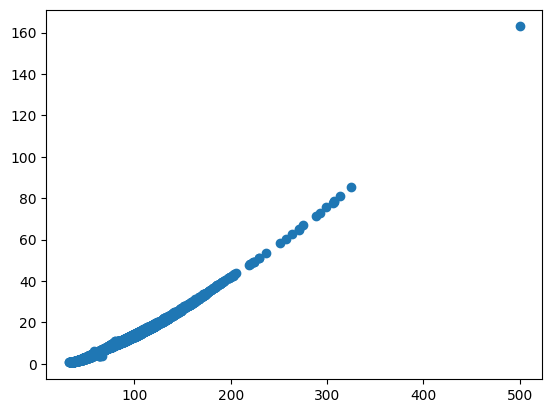

In [21]:
plt.scatter(df['Cota'], df['Vazao'])

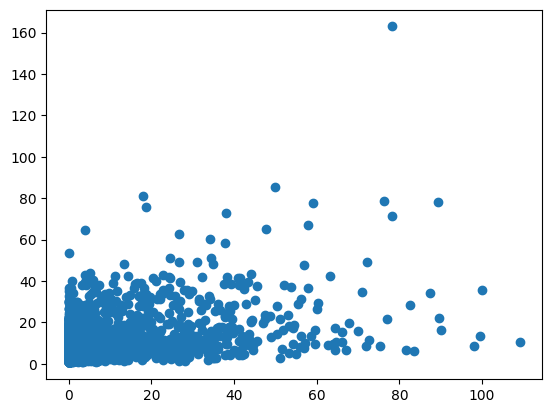

In [22]:
plt.scatter(df['Chuva'], df['Vazao'])

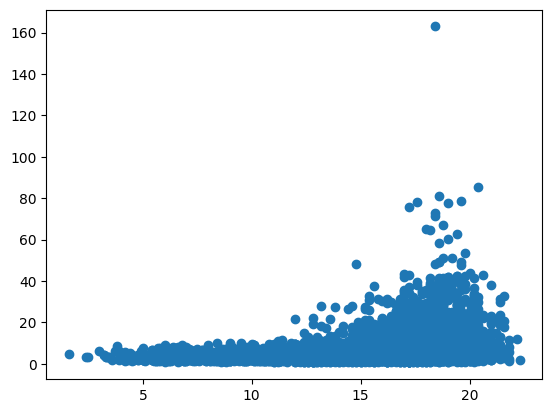

In [23]:
plt.scatter(df['temperatura_media_compensada'], df['Vazao'])

#### Covariância

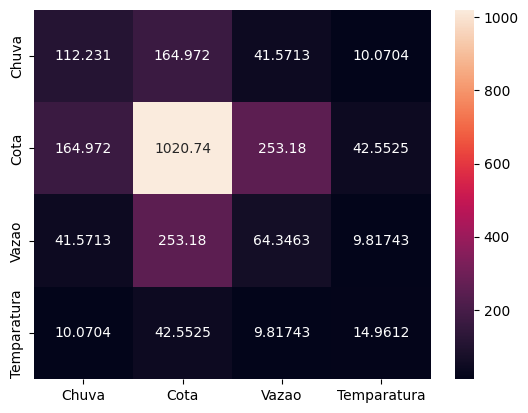

In [24]:
cov = np.cov(np.array([df.Chuva, df.Cota, df.Vazao, df.temperatura_media_compensada]), bias=True)
labs = ['Chuva', 'Cota', 'Vazao', 'Temparatura']

sns.heatmap(cov, annot=True, fmt='g', xticklabels=labs, yticklabels=labs)
plt.show()

#### Pearson

In [25]:
df[['Chuva', 'Cota', 'Vazao', 'temperatura_media_compensada']].corr(method='pearson')

,Chuva,Cota,Vazao,temperatura_media_compensada
Chuva,1.000000,0.487410,0.489187,0.245757
Cota,0.487410,1.000000,0.987892,0.344337
Vazao,0.489187,0.987892,1.000000,0.316412
temperatura_media_compensada,0.245757,0.344337,0.316412,1.000000


#### Spearman

In [26]:
df[['Chuva', 'Cota', 'Vazao', 'temperatura_media_compensada']].corr(method='spearman')

,Chuva,Cota,Vazao,temperatura_media_compensada
Chuva,1.000000,0.412715,0.406667,0.351475
Cota,0.412715,1.000000,0.994340,0.387984
Vazao,0.406667,0.994340,1.000000,0.376844
temperatura_media_compensada,0.351475,0.387984,0.376844,1.000000


## Previsão com série temporal

In [27]:
df['Lag_1'] = df['Vazao'].shift(-1)

In [28]:
df

,EstacaoCodigo_chuva,NivelConsistencia_chuva,Chuva,EstacaoCodigo_cota,NivelConsistencia_cota,Cota,EstacaoCodigo_vazao,NivelConsistencia_vazao,Vazao,EstacaoCodigo_temperatura,temperatura_media_compensada,Lag_1
Data,,,,,,,,,,,,
2023-04-29,2041005,1,32.1,57700000,1,69.0,57700000,1,7.2248,83639,18.4,7.2248
2023-04-28,2041005,1,0.0,57700000,1,69.0,57700000,1,7.2248,83639,16.2,5.9040
2023-04-27,2041005,1,0.0,57700000,1,64.0,57700000,1,5.9040,83639,18.6,5.9040
2023-04-26,2041005,1,0.0,57700000,1,64.0,57700000,1,5.9040,83639,17.4,6.0080
2023-04-25,2041005,1,0.0,57700000,1,64.5,57700000,1,6.0080,83639,16.0,6.2449
...,...,...,...,...,...,...,...,...,...,...,...,...
2010-01-05,2041005,1,0.3,57700000,2,132.0,57700000,2,22.2181,83639,16.6,22.7492
2010-01-04,2041005,1,0.0,57700000,2,134.0,57700000,2,22.7492,83639,17.8,18.6199
2010-01-03,2041005,1,0.0,57700000,2,118.0,57700000,2,18.6199,83639,15.8,26.5818


Text(0.5, 1.0, 'Lag Plot de Vazao')

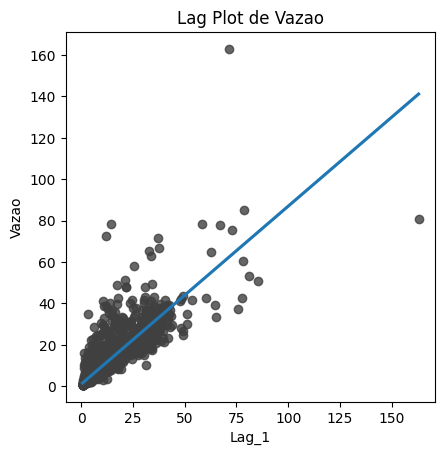

In [29]:
fig, ax = plt.subplots()
ax = sns.regplot(x='Lag_1', y='Vazao', data=df, ci=None, scatter_kws=dict(color='0.25'))
ax.set_aspect('equal')
ax.set_title('Lag Plot de Vazao')

In [30]:
# Pipeline
pipe = make_pipeline(
    StandardScaler(),
    RandomForestRegressor(random_state=0, n_jobs=-1))

# Divide os dados
X = df[['Chuva', 'Cota', 'Lag_1', 'temperatura_media_compensada']].dropna() 
y = df.Vazao
y, X = y.align(X, join='inner') 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
# Treinamento

pipe = RandomForestRegressor(random_state=0)
pipe.fit(X_train, y_train)
y_pred = pd.Series(pipe.predict(X_test), index=X_test.index)
# Avaliação
mean_absolute_error(y_pred, y_test)

0.251547395543176

In [31]:
print(f'R2 = {r2_score(pipe.predict(X_test), y_test) :.4f}')

R2 = 0.9094


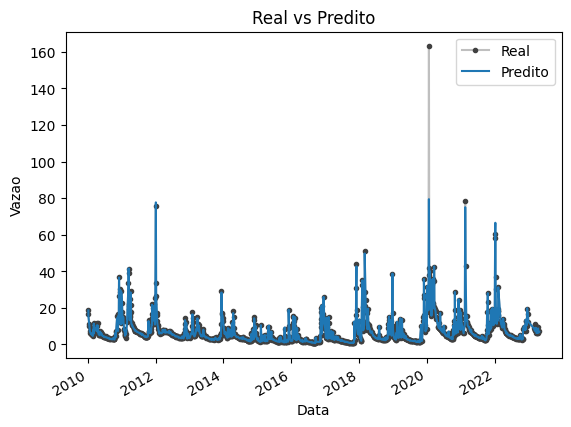

In [32]:
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
)
ax = y_test.plot(**plot_params, label='oi')
ax = y_pred.plot(ylabel='Vazao', legend=1)
plt.legend(['Real','Predito']) 
plt.title('Real vs Predito')
plt.show()